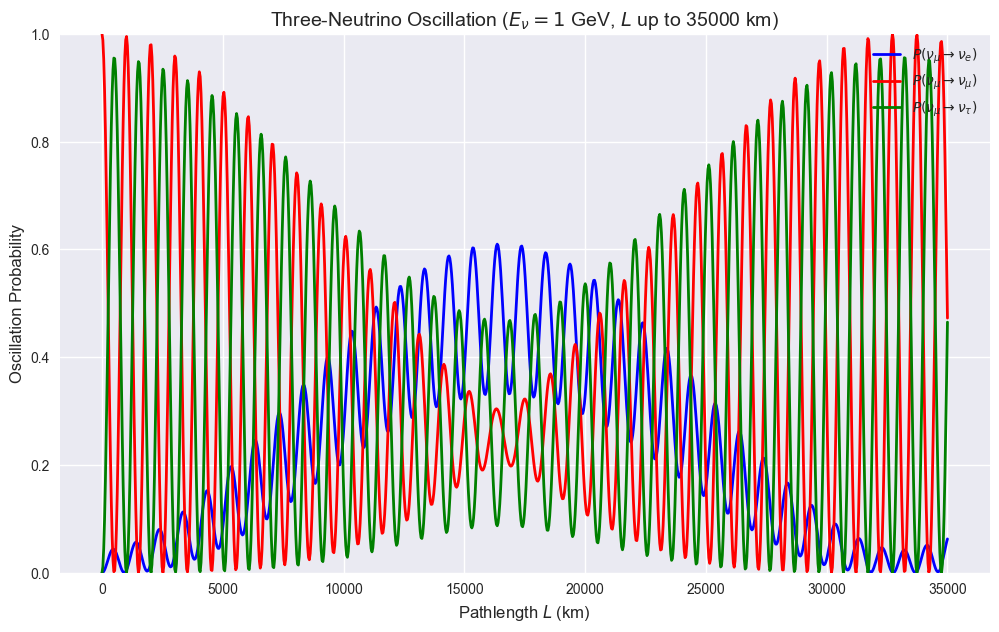

In [66]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')  # Professional style

# Parameters (PDG 2020 values)
delta_m21_sq = 7.5e-5  # eV^2, solar
delta_m31_sq = 2.5e-3  # eV^2, atmospheric
sin2_theta12 = 0.307
sin2_theta13 = 0.021
sin2_theta23 = 0.51
E_nu = 1.0  # GeV
delta_CP = 0.0  # radians, no CP violation

# Compute mixing angles
theta12 = np.arcsin(np.sqrt(sin2_theta12))
theta13 = np.arcsin(np.sqrt(sin2_theta13))
theta23 = np.arcsin(np.sqrt(sin2_theta23))

# Cosines and sines
c12, s12 = np.cos(theta12), np.sin(theta12)
c13, s13 = np.cos(theta13), np.sin(theta13)
c23, s23 = np.cos(theta23), np.sin(theta23)

# Full PMNS matrix
U = np.array([
    [c12*c13, s12*c13, s13*np.exp(-1j*delta_CP)],
    [-s12*c23-c12*s23*s13*np.exp(1j*delta_CP), c12*c23-s12*s23*s13*np.exp(1j*delta_CP), s23*c13],
    [s12*s23-c12*c23*s13*np.exp(1j*delta_CP), -c12*s23-s12*c23*s13*np.exp(1j*delta_CP), c23*c13]
])

# Function to compute oscillation probability
def oscillation_probability(L, E, dm2_21, dm2_31, U, alpha, beta):
    delta_m2 = np.array([0, dm2_21, dm2_31])  # dm2_11, dm2_21, dm2_31
    prob = 0
    for i in range(3):
        for j in range(i+1, 3):
            delta = 1.267 * (delta_m2[j] - delta_m2[i]) * L / E
            re_term = np.real(U[alpha,i] * np.conj(U[beta,i]) * np.conj(U[alpha,j]) * U[beta,j])
            prob += -4 * re_term * np.sin(delta)**2
    if alpha == beta:
        prob += 1
    return np.clip(prob, 0, 1)  # Ensure probabilities stay within [0, 1]

# Pathlength array
L = np.linspace(0, 35000, 1000)  # km, 0 to 35000 km

# Compute probabilities (0: nu_e, 1: nu_mu, 2: nu_tau)
P_mu_e = np.array([oscillation_probability(l, E_nu, delta_m21_sq, delta_m31_sq, U, 1, 0) for l in L])
P_mu_mu = np.array([oscillation_probability(l, E_nu, delta_m21_sq, delta_m31_sq, U, 1, 1) for l in L])
P_mu_tau = np.array([oscillation_probability(l, E_nu, delta_m21_sq, delta_m31_sq, U, 1, 2) for l in L])

# Create plot
plt.figure(figsize=(12, 7))
plt.plot(L, P_mu_e, label=r'$P(\nu_\mu \to \nu_e)$', color='blue', linewidth=2)
plt.plot(L, P_mu_mu, label=r'$P(\nu_\mu \to \nu_\mu)$', color='red', linewidth=2)
plt.plot(L, P_mu_tau, label=r'$P(\nu_\mu \to \nu_\tau)$', color='green', linewidth=2)
plt.xlabel('Pathlength $L$ (km)', fontsize=12)
plt.ylabel('Oscillation Probability', fontsize=12)
plt.title('Three-Neutrino Oscillation ($E_\\nu = 1$ GeV, $L$ up to 35000 km)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=10, loc='upper right', facecolor='white', edgecolor='black', framealpha=1)
plt.ylim(0, 1)  # Strict [0, 1] range

# Save and show
plt.savefig('three_neutrino_oscillation_35000km.png', dpi=300)
plt.show()

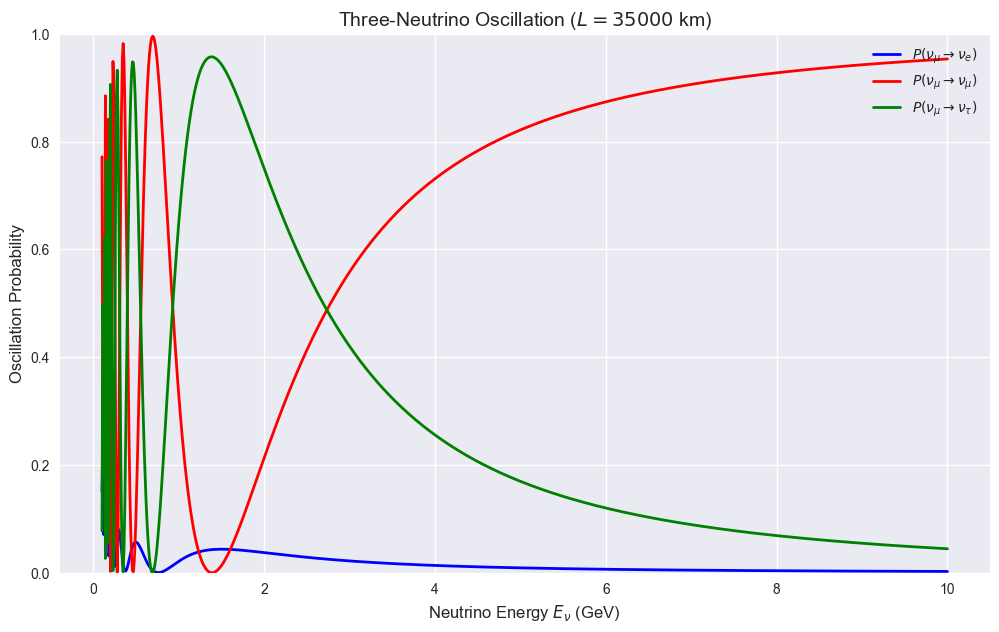

In [69]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')  # Professional style

# Parameters (PDG 2020 values)
delta_m21_sq = 7.5e-5  # eV^2, solar
delta_m31_sq = 2.5e-3  # eV^2, atmospheric
sin2_theta12 = 0.307
sin2_theta13 = 0.021
sin2_theta23 = 0.51
L = 700.0  # km, fixed pathlength
delta_CP = 0.0  # radians, no CP violation

# Compute mixing angles
theta12 = np.arcsin(np.sqrt(sin2_theta12))
theta13 = np.arcsin(np.sqrt(sin2_theta13))
theta23 = np.arcsin(np.sqrt(sin2_theta23))

# Cosines and sines
c12, s12 = np.cos(theta12), np.sin(theta12)
c13, s13 = np.cos(theta13), np.sin(theta13)
c23, s23 = np.cos(theta23), np.sin(theta23)

# Full PMNS matrix
U = np.array([
    [c12*c13, s12*c13, s13*np.exp(-1j*delta_CP)],
    [-s12*c23-c12*s23*s13*np.exp(1j*delta_CP), c12*c23-s12*s23*s13*np.exp(1j*delta_CP), s23*c13],
    [s12*s23-c12*c23*s13*np.exp(1j*delta_CP), -c12*s23-s12*c23*s13*np.exp(1j*delta_CP), c23*c13]
])

# Function to compute oscillation probability
def oscillation_probability(L, E, dm2_21, dm2_31, U, alpha, beta):
    delta_m2 = np.array([0, dm2_21, dm2_31])  # dm2_11, dm2_21, dm2_31
    prob = 0
    for i in range(3):
        for j in range(i+1, 3):
            delta = 1.267 * (delta_m2[j] - delta_m2[i]) * L / E
            re_term = np.real(U[alpha,i] * np.conj(U[beta,i]) * np.conj(U[alpha,j]) * U[beta,j])
            prob += -4 * re_term * np.sin(delta)**2
    if alpha == beta:
        prob += 1
    return np.clip(prob, 0, 1)  # Ensure probabilities within [0, 1]

# Energy array
E_nu = np.linspace(0.1, 10, 1000)  # GeV, 0.1 to 10 GeV

# Compute probabilities (0: nu_e, 1: nu_mu, 2: nu_tau)
P_mu_e = np.array([oscillation_probability(L, e, delta_m21_sq, delta_m31_sq, U, 1, 0) for e in E_nu])
P_mu_mu = np.array([oscillation_probability(L, e, delta_m21_sq, delta_m31_sq, U, 1, 1) for e in E_nu])
P_mu_tau = np.array([oscillation_probability(L, e, delta_m21_sq, delta_m31_sq, U, 1, 2) for e in E_nu])

# Create plot
plt.figure(figsize=(12, 7))
plt.plot(E_nu, P_mu_e, label=r'$P(\nu_\mu \to \nu_e)$', color='blue', linewidth=2)
plt.plot(E_nu, P_mu_mu, label=r'$P(\nu_\mu \to \nu_\mu)$', color='red', linewidth=2)
plt.plot(E_nu, P_mu_tau, label=r'$P(\nu_\mu \to \nu_\tau)$', color='green', linewidth=2)
plt.xlabel('Neutrino Energy $E_\\nu$ (GeV)', fontsize=12)
plt.ylabel('Oscillation Probability', fontsize=12)
plt.title('Three-Neutrino Oscillation ($L = 35000$ km)', fontsize=14)
plt.grid(True)
plt.legend(fontsize=10, loc='upper right', facecolor='white', edgecolor='black', framealpha=1)
plt.ylim(0, 1)  # Strict [0, 1] range

# Save and show
plt.savefig('three_neutrino_oscillation_energy_35000km.png', dpi=300)
plt.show()